In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 차원이 너무 크면 훈련이 느려지고, 좋은 솔루션을 찾기 힘들다
- 중요한 혹은 두 세개의 차원으로 축소하면 시각화에 아주 유용하다
- 차원 축소에 접근하는 방법들
    - 투영
    - 매니폴드
- 차원 축소 기법
    - PCA
    - 커널 PCA
    - LLE

#8.1 차원의 저주

**요약**

- 차원은 신기하다!!
- 고차원 공간에서는 많은 것이 다르게 작동한다..
- **훈련세트의 차원이 클수록 과대적합 위험이 커진다!!**
- 이론적으로는 훈련 샘플의 밀도가 충분히 높아질 때까지 훈련 세트의 크기를 키우면 된다..
    - 근데 차원이 커짐에 따라 필요한 샘플 수가 기하급수적으로 늘어난다
- 그래서 차원 축소가 중요하다!!

#8.2 차원 축소를 위한 접근 방법

##8.2.1 투영

- 많은 특성들(차원들) 중에서도 서로 강하게 연관되어 있는 특성들이 있다..
- 모든 훈련 샘플이 고차원 안의 저차원 **부분 공간**에 놓여 있다..
- 그럼 그 공간에 투영을 시킨다!!
-  항상 최고의 방법은 아니다..
    - **스위스 롤**같이 부분 공간이 뒤틀려있는 경우..

###2차원에 가깝게 배치된 3차원 데이터 셋

**(그림 1)**

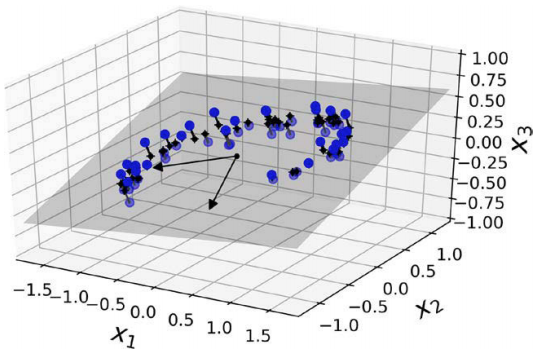

**(그림 2)**

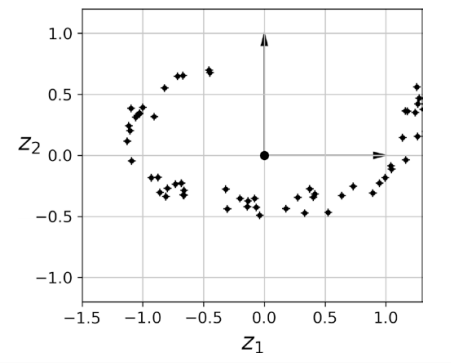

**분석**

- (그림 1)에 파란점들이 3차원 공간에 있지만 평면에(2차원) 가까이 놓여있다
- 그 평면으로 투영시킨 결과가 (그림 2)이다

##8.2.2 매니폴드 학습

###매니폴드 학습

- 대부분의 차원 축소 알고리즘이 **매니폴드**를 모델링하는 식으로 작동함
- **$d$차원 매니폴드**는 국부적으로 $d$차원 초평면으로 보일 수 있는 $n$차원 공간의 일부이다 $(d < n)$
- 고차원 공간에서 휘어지거나 뒤틀린 저차원 모양

####스위스 롤 (2D 매니폴드)

스위스 롤을 가져오자..

In [4]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

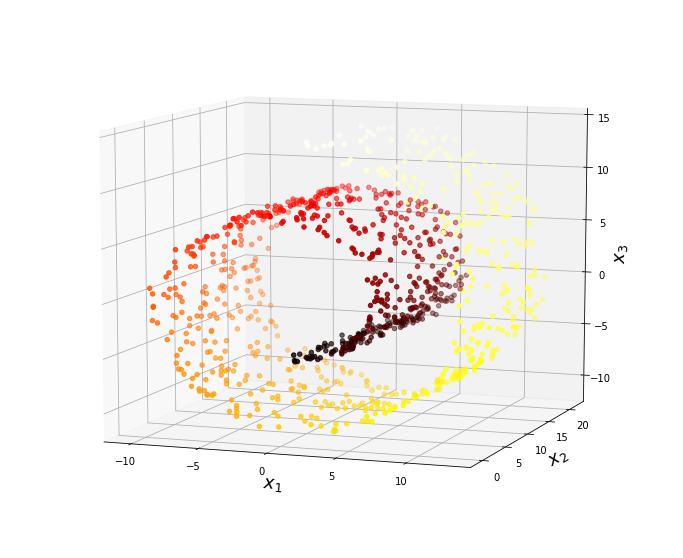

In [6]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

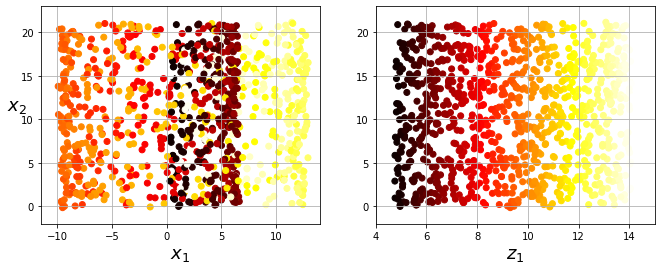

In [7]:
#투영시킨것 과 펼친 것

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

**분석**

- 왼쪽 그림은 그냥 스위스 롤을 $\mathbf{x}_1, \mathbf{x}_2$ 평면으로 투영한 것
- **오른쪽 그림은 스위스 롤을 펼쳐 놓은것..**
    - 우리가 원하는 것!

###매니폴드 가정

- **처리하려는 작업이 저차원의 매니폴드 공간에 표현되면 더 간단해질 것**이라는 가정
- 다만 경험적으로 그런 것이지 항상 유효하지는 않음
- 전적으로 데이터셋에 달림

그림 1


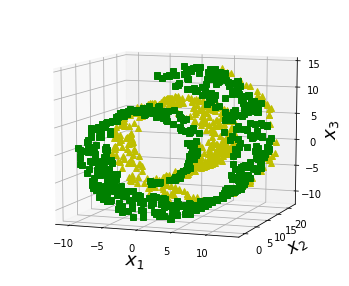

그림 2


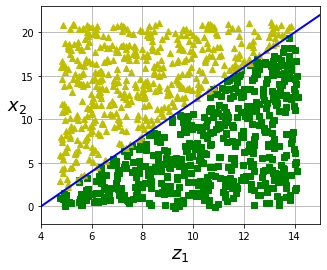

그림 3


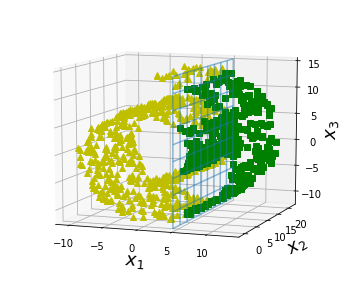

그림 4


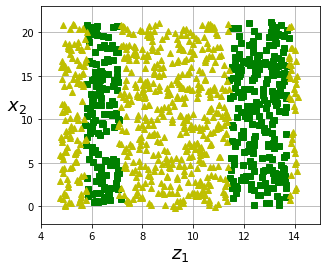

In [11]:
from matplotlib import gridspec

axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

#1번째 그림
print("그림 1")
fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = 2 * (t[:] - 4) > X[:, 1]
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

#2번째 그림
print("그림 2")
fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()

#3번째 그림
print("그림 3")
fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = X[:, 0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

#4번째 그림
print("그림 4")
fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()

**분석**

- 그림 1, 그림 2
    - 매니폴드 가정이 유효함
    - 그림 2에서 그림 1보다 분류가 훨씬 수월함..
- 그림 3, 그림4
    - 매니폴드 가정이 유효하지 않은 경우
    - 그림 3은 평면하나로 분류되는데, 그림 4는 4개의 직선이 필요함..

#8.3 PCA

##8.3.1 분산 보존

##8.3.2 주성분

##8.3.3 d차원으로 투영하기

##8.3.4 사이킷런 사용하기

##8.3.5 설명된 분산의 비율

##8.3.6 적절한 차원 수 선택하기

##8.3.7 압축을 위한 PCA

##8.3.8 랜덤 PCA

##8.3.9 점진적 PCA

#8.4 커널 PCA

##8.4.1 커널 선택과 하이퍼파라미터 튜닝

#8.5 LLE

#8.6 다른 차원 축소 기법

#8.7 연습문제